# Import relevant libraries
1. Set latitude and longitude of san francisco weather station to acquire weather data of the city
    a, Register in darksky website and get api key to obtain weather data of the choosen time frame.
2. Register in plotly and get user name and api_key for plotting some graphs

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import zipfile
import forecastio
import seaborn as sns
from matplotlib import pyplot as plt
api_key = "915aefdbf458a7cfe6a913d660ae1886"
lat = -31.967819
lng = 115.87718
import plotly.plotly as py
import plotly.graph_objs as go
import plotly 
plotly.tools.set_credentials_file(username='saikumar_naani', api_key='QUwVO1Br7b4KyUTO6nRX')
from datetime import datetime

# Give start and end dates for as the required time frame 
In my case, i would like to take 2019-01 and 2019-02 months San francisco Fordgobike data

In [2]:
start = dt.datetime(2019, 1, 1, 0, 0, 0)
end = dt.datetime(2019, 3, 1, 0, 0, 0)
daterange = pd.date_range(start, end)
weather = pd.DataFrame(columns = ['temperature','timestamp'])
weather.as_index=True

In [3]:
for single_date in daterange:
    forecast = forecastio.load_forecast(api_key, lat, lng, time=single_date)
    byHour = forecast.hourly()
    a=[]
    c=[]
    for hourlyData in byHour.data:
        a.append(hourlyData.temperature)
        c.append(hourlyData.time)
    df = pd.DataFrame({'temperature': a,'timestamp': c})
    weather = weather.append(df,ignore_index=True)
weather.head()

,temperature,timestamp
0,20.17,2018-12-31 16:00:00
1,20.06,2018-12-31 17:00:00
2,19.06,2018-12-31 18:00:00
3,17.16,2018-12-31 19:00:00
4,17.05,2018-12-31 20:00:00


# Convert the obtained temperature which is in degress to celsius

In [4]:
weather['tempincelsius']=round(5/9*(weather['temperature']-32))
weather.head()

,temperature,timestamp,tempincelsius
0,20.17,2018-12-31 16:00:00,-7.0
1,20.06,2018-12-31 17:00:00,-7.0
2,19.06,2018-12-31 18:00:00,-7.0
3,17.16,2018-12-31 19:00:00,-8.0
4,17.05,2018-12-31 20:00:00,-8.0


# Get data from https://s3.amazonaws.com/fordgobike-data/index.html

In [5]:
i=0
while i<2:
    # https://s3.amazonaws.com/fordgobike-data/201901-fordgobike-tripdata.csv.zip
    zf = zipfile.ZipFile('/Users/saikumar/Downloads/20190'+str(i+1)+'-fordgobike-tripdata.csv.zip') 
    df = pd.read_csv(zf.open('20190'+str(i+1)+'-fordgobike-tripdata.csv'))
    df['start_time'] = df.start_time.apply(lambda x:dt.datetime.strptime(x,"%Y-%m-%d %H:%M:%S.%f"))
    df['end_time'] = df.end_time.apply(lambda x:dt.datetime.strptime(x,"%Y-%m-%d %H:%M:%S.%f"))
    df = df[df['start_time'].dt.month == i+1]
    df = df[df['start_time'].dt.year == 2019]
    if i ==0:
        data=df
    else:
        data=data.append(df, ignore_index=True)
    i+=1
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,1989.0,Male,No
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,1989.0,Male,No
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,1965.0,Female,No
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,1974.0,Male,No
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,NaN,NaN,No


# Calculte the member age, convert the duration seconds to minutes and add a new column called Booking_weekday which stores day of the week

In [6]:
data['member_age']=2019.0-data['member_birth_year']
data['duration_min'] = data['duration_sec']/60
data['Booking_weekday']=data['start_time'].dt.weekday
data['Booking_date']=data['start_time'].map(lambda x: x.strftime('%Y-%m-%d %H'))
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,duration_min,Booking_weekday,Booking_date
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,1989.0,Male,No,30.0,1347.083333,3,2019-01-31 17
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,1989.0,Male,No,30.0,1098.333333,3,2019-01-31 20
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,1965.0,Female,No,54.0,1043.883333,3,2019-01-31 18
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,1974.0,Male,No,45.0,744.666667,3,2019-01-31 19
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,NaN,NaN,No,NaN,1011.816667,3,2019-01-31 14


# Merge the two dataframes (data and Weather) into (result) dataframe
Merge is based the year,month,day,hour and assign hourly weather data when the booking initiated (start_time). Assume, that all the given lattitude and longitude belongs to San Francisco and No validation is performed here. 

In [7]:
result=pd.merge(data,weather,left_on=data['start_time'].map(lambda x: x.strftime('%Y-%m-%d %H')),right_on=weather['timestamp'].map(lambda x: x.strftime('%Y-%m-%d %H')),how='left')
result.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,member_age,duration_min,Booking_weekday,Booking_date,temperature,timestamp,tempincelsius
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,...,1989.0,Male,No,30.0,1347.083333,3,2019-01-31 17,28.07,2019-01-31 17:00:00,-2.0
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,...,1989.0,Male,No,30.0,1098.333333,3,2019-01-31 20,25.05,2019-01-31 20:00:00,-4.0
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,...,1965.0,Female,No,54.0,1043.883333,3,2019-01-31 18,27.04,2019-01-31 18:00:00,-3.0
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,...,1974.0,Male,No,45.0,744.666667,3,2019-01-31 19,26.06,2019-01-31 19:00:00,-3.0
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,...,NaN,NaN,No,NaN,1011.816667,3,2019-01-31 14,25.28,2019-01-31 14:00:00,-4.0


# Drop the rows which has Nan values

In [8]:
result=result.dropna()
result=result.reset_index(drop=True)
result.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,member_age,duration_min,Booking_weekday,Booking_date,temperature,timestamp,tempincelsius
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,...,1989.0,Male,No,30.0,1347.083333,3,2019-01-31 17,28.07,2019-01-31 17:00:00,-2.0
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,...,1989.0,Male,No,30.0,1098.333333,3,2019-01-31 20,25.05,2019-01-31 20:00:00,-4.0
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,...,1965.0,Female,No,54.0,1043.883333,3,2019-01-31 18,27.04,2019-01-31 18:00:00,-3.0
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,...,1974.0,Male,No,45.0,744.666667,3,2019-01-31 19,26.06,2019-01-31 19:00:00,-3.0
4,6733,2019-01-31 22:35:50.813,2019-02-01 00:28:04.512,245.0,Downtown Berkeley BART,37.870139,-122.268422,266.0,Parker St at Fulton St,37.862464,...,1994.0,Male,No,25.0,112.216667,3,2019-01-31 22,25.16,2019-01-31 22:00:00,-4.0


In [9]:
result.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,member_age,duration_min,Booking_weekday,temperature,tempincelsius
count,356506.000000,356506.000000,356506.000000,356506.000000,356506.000000,356506.000000,356506.000000,356506.000000,356506.000000,356506.000000,356506.000000,356506.000000,356506.000000,356506.000000
mean,709.935106,135.888745,37.772462,-122.354534,133.813148,37.772618,-122.354112,4261.055783,1984.465832,34.534168,11.832252,2.573421,22.918772,-5.067842
std,1586.703833,110.450177,0.096067,0.113676,110.195595,0.095965,0.113238,1625.171843,10.114891,10.114891,26.445064,1.772059,5.569542,3.103443
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,18.000000,1.016667,0.000000,7.160000,-14.000000
25%,326.000000,44.000000,37.770407,-122.411901,42.000000,37.771058,-122.411647,3432.000000,1980.000000,27.000000,5.433333,1.000000,19.060000,-7.000000
50%,515.000000,101.000000,37.780955,-122.398295,98.000000,37.781010,-122.397437,4833.000000,1987.000000,32.000000,8.583333,3.000000,22.080000,-6.000000
75%,796.000000,223.000000,37.797280,-122.289415,219.000000,37.797320,-122.291209,5315.000000,1992.000000,39.000000,13.266667,4.000000,26.170000,-3.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,141.000000,1409.133333,6.000000,42.050000,6.000000


# Check the member_age here.
This looks a bit starnge in Max value. i.e, Age of the person is 141? May be we apply a distribution box plot to find outliers and remove them after certain age for better results
# Box Plot to find outliers in member_age

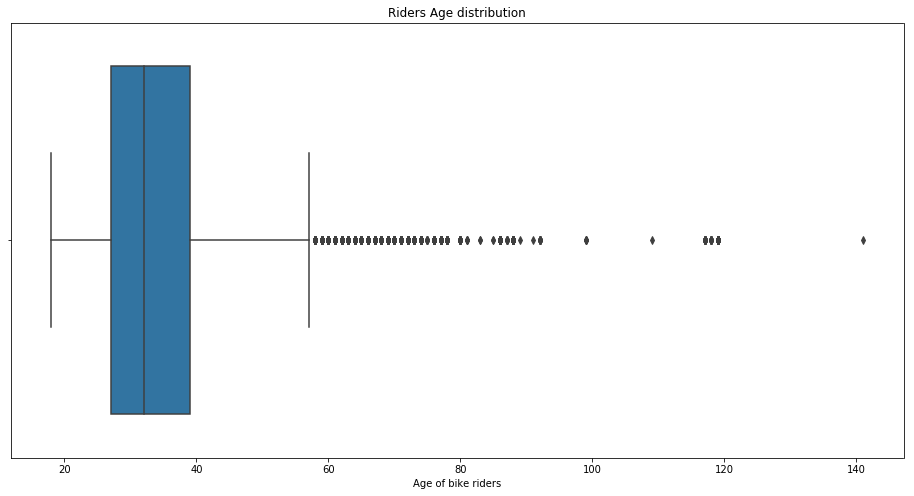

In [10]:
plt.figure(figsize=(16,8))
sns.boxplot(x='member_age', data=result)
plt.title("Riders Age distribution")
plt.xlabel("Age of bike riders")
plt.show()

Here, we can clearly see that we have some outliers whose age is recorded more that 57 around. So, we make the age limit as 60 and remove the user records who croses 60.

In [11]:
result = result[result['member_age']<=60]

Let's create some age range and see the number of bookings and percentage of rides booked WRT age

In [12]:
result['member_age_bins'] = result['member_age'].apply(lambda x: '10 - 20' if 10<x<=20 
                                                                        else '20 - 30' if 20<x<=30
                                                                        else '30 - 40' if 30<x<=40
                                                                        else '40 - 50' if 40<x<=50
                                                                        else '50 - 60' if 50<x<=60
                                                                        else x)
result.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,member_age,duration_min,Booking_weekday,Booking_date,temperature,timestamp,tempincelsius,member_age_bins
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,...,Male,No,30.0,1347.083333,3,2019-01-31 17,28.07,2019-01-31 17:00:00,-2.0,20 - 30
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,...,Male,No,30.0,1098.333333,3,2019-01-31 20,25.05,2019-01-31 20:00:00,-4.0,20 - 30
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,...,Female,No,54.0,1043.883333,3,2019-01-31 18,27.04,2019-01-31 18:00:00,-3.0,50 - 60
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,...,Male,No,45.0,744.666667,3,2019-01-31 19,26.06,2019-01-31 19:00:00,-3.0,40 - 50
4,6733,2019-01-31 22:35:50.813,2019-02-01 00:28:04.512,245.0,Downtown Berkeley BART,37.870139,-122.268422,266.0,Parker St at Fulton St,37.862464,...,Male,No,25.0,112.216667,3,2019-01-31 22,25.16,2019-01-31 22:00:00,-4.0,20 - 30


# Temperature variation over the choosen timeframe

In [13]:
temp = go.Scatter(
    x=weather['timestamp'],
    y=weather['tempincelsius'],
    name = "temperature",
    line = dict(color = '#17BECF'),
    opacity = 0.8)
dat=[temp]
layout = dict(
    title='Temperature variation throughout the choosen timeframe'
)
fig=dict(data=dat,layout=layout)
py.iplot(fig)

# Temperature and Number of bookings over the choosen timeframe

In [14]:
df=result.groupby(['Booking_date','tempincelsius'],as_index=False).bike_id.count()
temp = go.Scatter(
    x=df['Booking_date'],
    y=df['tempincelsius'],
    name = "temperature",
    line = dict(color = '#17BECF'),
    opacity = 0.8)
Bikecount = go.Scatter(
    x=df['Booking_date'],
    y=df['bike_id'],
    name = "Average Number of Bookings",
    line = dict(color = '#7F7F7F'),
    opacity = 0.8)
dat=[temp,Bikecount]
layout = dict(
    title='Temperature and Average Number of bookings per day hour'
)
fig=dict(data=dat,layout=layout)
py.iplot(fig)

# Number of bookings recorded over the temperature variation

In [15]:
df=result.groupby(['tempincelsius'],as_index=False).bike_id.count()
count = go.Scatter(
    x=df['tempincelsius'],
    y=df['bike_id'],
    name = "Number of Bookings",
    line = dict(color = '#17BECF'),
    opacity = 0.8)
dat=[count]
layout = dict(
    title='Number of bookings when temperature is'
)
fig=dict(data=dat,layout=layout)
py.iplot(fig)

# Graph on Number of bookings per Gender and user type
Seems like males are riding more than the female and other gender

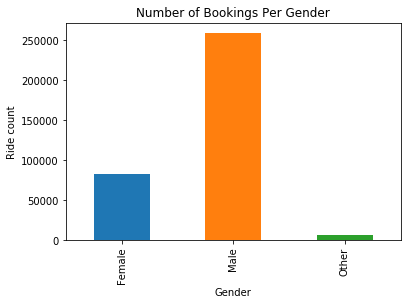

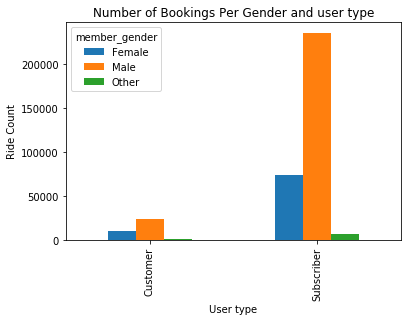

In [16]:
result.groupby('member_gender').bike_id.count().plot(kind='bar')
plt.title('Number of Bookings Per Gender')
plt.xlabel('Gender')
plt.ylabel('Ride count')
result.groupby(['user_type','member_gender']).count()['bike_id'].unstack().plot(kind='bar')
plt.title('Number of Bookings Per Gender and user type')
plt.xlabel('User type')
plt.ylabel('Ride Count')
plt.show()

# Number of bookings at each station id during the taken timeframe and ordered in ascending order of Maximum number of bookings at the station

In [17]:
result.groupby(['start_station_id'],as_index=False)['bike_id'].count().sort_values('bike_id',ascending=False).rename(columns={'bike_id':'Number of bookings'}).head()


,start_station_id,Number of bookings
48,58.0,7255
56,67.0,6883
68,81.0,5823
17,21.0,5614
0,3.0,5400


# Number of drops at each station id during the taken timeframe and ordered in ascending order of Maximum number of dropings at the station

In [18]:
result.groupby(['end_station_id'],as_index=False)['bike_id'].count().sort_values('bike_id',ascending=False).rename(columns={'bike_id':'Number of bookings'}).head()

,end_station_id,Number of bookings
56,67.0,9473
48,58.0,7394
17,21.0,6891
11,15.0,6286
26,30.0,6140


# The below dataframe is ordered in ascending order of the busiest route (start_station_id and end_station_id) recorded in the data

In [19]:
result.groupby(['start_station_id','end_station_id'],as_index=False)['bike_id'].count().sort_values('bike_id',ascending=False).rename(columns={'bike_id':'Number of bookings'}).head()


,start_station_id,end_station_id,Number of bookings
1370,15.0,6.0,669
8464,81.0,15.0,649
18646,196.0,182.0,634
445,6.0,16.0,596
17897,182.0,196.0,582


# The below dataframe is ordered in ascending order of highest number of bookings recorded at station ids when the temperature is!

In [20]:
result.groupby(['tempincelsius','start_station_id'],as_index=False)['bike_id'].count().sort_values('bike_id',ascending=False).rename(columns={'bike_id':'Number of bookings'}).head()


,tempincelsius,start_station_id,Number of bookings
1734,-7.0,58.0,1292
1703,-7.0,21.0,1056
1686,-7.0,3.0,1039
1754,-7.0,81.0,958
2393,-5.0,58.0,911


# The below dataframe describes the number bookings recorded for a route (start_station_id and end_station_id) by different member_age_bins on day of the week at different weather conditions 

In [21]:
result.groupby(['tempincelsius','start_station_id','end_station_id','member_age_bins','Booking_weekday'],as_index=False)['bike_id'].count().rename(columns={'bike_id':'Number of bookings'}).head()


,tempincelsius,start_station_id,end_station_id,member_age_bins,Booking_weekday,Number of bookings
0,-14.0,3.0,22.0,20 - 30,3,1
1,-14.0,3.0,44.0,20 - 30,3,1
2,-14.0,3.0,55.0,20 - 30,3,1
3,-14.0,3.0,64.0,20 - 30,3,1
4,-14.0,3.0,147.0,30 - 40,3,1


# Plot on Number of Bookings by Member age and Member_age_bins

In [22]:
df=result.groupby(['member_age'],as_index=False).bike_id.count()
count = go.Scatter(
    x=df['member_age'],
    y=df['bike_id'],
    name = "Number of Bookings",
    line = dict(color = '#17BECF'),
    opacity = 0.8)
dat=[count]
layout = dict(
    title='Number of bookings per member age'
)
fig=dict(data=dat,layout=layout)
py.iplot(fig)

In [23]:
df=result.groupby(['member_age_bins'],as_index=False).bike_id.count()
count = go.Scatter(
    x=df['member_age_bins'],
    y=df['bike_id'],
    name = "Number of Bookings",
    line = dict(color = '#17BECF'),
    opacity = 0.8)
dat=[count]
layout = dict(
    title='Number of bookings per member age bins'
)
fig=dict(data=dat,layout=layout)
py.iplot(fig)

# Number of Bookings made by user type, member age and member age bins

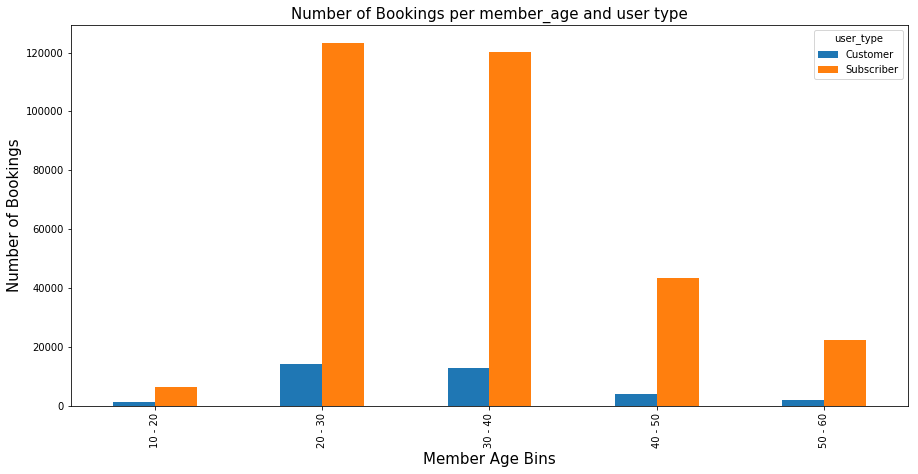

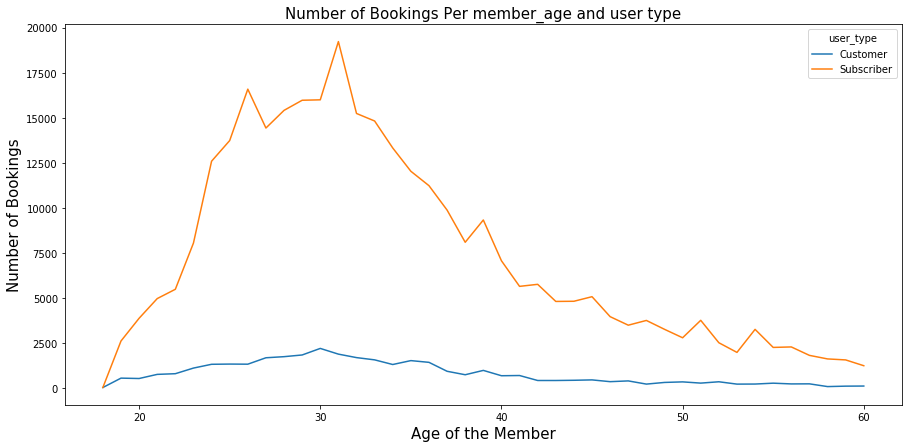

In [24]:
result.groupby(['member_age_bins','user_type']).count()['bike_id'].unstack().plot(kind='bar',figsize=(15,7))
plt.title('Number of Bookings per member_age and user type',fontsize=15)
plt.xlabel('Member Age Bins',fontsize=15)
plt.ylabel('Number of Bookings',fontsize=15)
result.groupby(['member_age','user_type']).count()['bike_id'].unstack().plot(kind='line',figsize=(15,7))
plt.title('Number of Bookings Per member_age and user type',fontsize=15)
plt.xlabel('Age of the Member',fontsize=15)
plt.ylabel('Number of Bookings',fontsize=15)
plt.show()

# Number of Bookings per station id

In [25]:
df=result.groupby('start_station_id',as_index=False).bike_id.count()
Bikecount = go.Scatter(
    x=df['start_station_id'],
    y=df['bike_id'],
    name = "Number of Bookings",
    line = dict(color = '#17BECF'),
    opacity = 0.8)
dat=[Bikecount]
layout = dict(
    title='Number of Bookings Per station'
)
fig=dict(data=dat,layout=layout)
py.iplot(fig)

# Number of dropings per station

In [26]:
df=result.groupby('end_station_id',as_index=False).bike_id.count()
Bikecount = go.Scatter(
    x=df['end_station_id'],
    y=df['bike_id'],
    name = "Number of Bookings",
    line = dict(color = '#17BECF'),
    opacity = 0.8)
dat=[Bikecount]
layout = dict(
    title='Number of Drops Per station'
)
fig=dict(data=dat,layout=layout)
py.iplot(fig)

# Plot on Number of Bookings Per User age Group at temperature in celsius

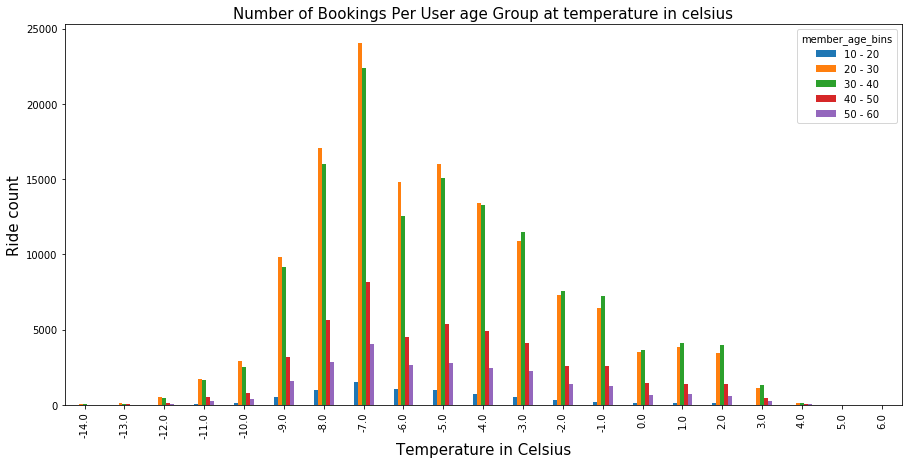

In [27]:
result.groupby(['tempincelsius','member_age_bins']).count()['bike_id'].unstack().plot(kind='bar',figsize=(15,7))
plt.title('Number of Bookings Per User age Group at temperature in celsius',fontsize=15)
plt.xlabel('Temperature in Celsius',fontsize=15)
plt.ylabel('Ride count',fontsize=15)
plt.show()

# Plot on the Number of bookings made by the Member_age_bins per day

In [28]:
result.groupby([result['start_time'].dt.date,'member_age_bins'],as_index=True,sort=True).bike_id.count().rename(columns={'bike_id':'Number of bookings'}).head()

start_time  member_age_bins
2019-01-01  10 - 20             87
            20 - 30            897
            30 - 40            738
            40 - 50            294
            50 - 60            173
dtype: int64

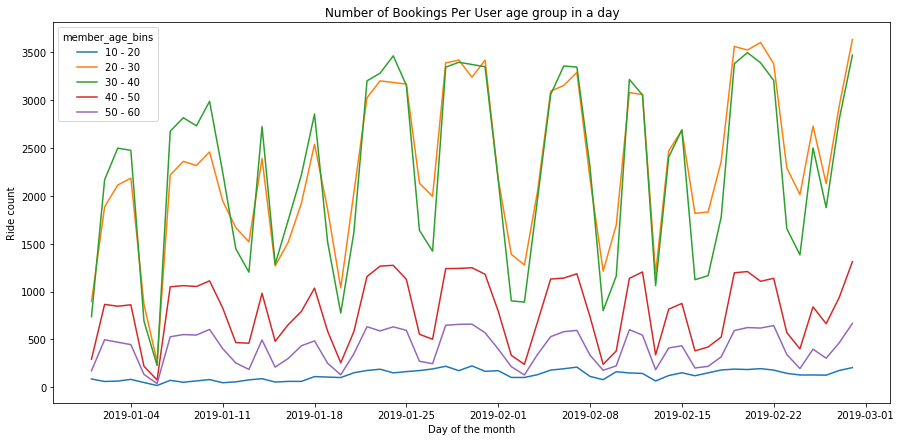

In [29]:
result.groupby([result['start_time'].dt.date,'member_age_bins']).count()['bike_id'].unstack().plot(figsize=(15,7))
plt.title('Number of Bookings Per User age group in a day')
plt.xlabel('Day of the month')
plt.ylabel('Ride count')
plt.show()

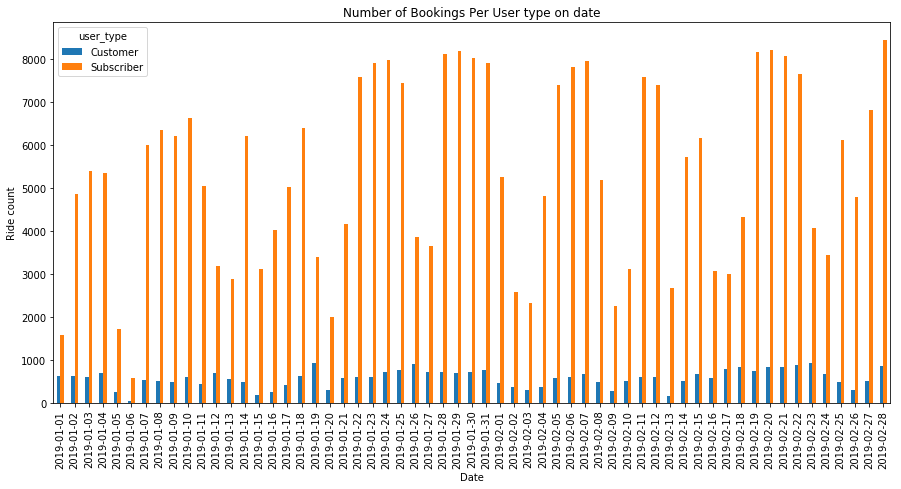

In [30]:
result.groupby([result['start_time'].dt.date,'user_type']).count()['bike_id'].unstack().plot(kind='bar',figsize=(15,7))
plt.title('Number of Bookings Per User type on date')
plt.xlabel('Date')
plt.ylabel('Ride count')
plt.show()

# Plot on the Number of bookings made by member_age_bins by the weekdays

In [31]:
result.groupby([result['start_time'].dt.weekday,'member_age_bins']).count()['bike_id'].head()

start_time  member_age_bins
0           10 - 20             1127
            20 - 30            20238
            30 - 40            19824
            40 - 50             7040
            50 - 60             3683
Name: bike_id, dtype: int64

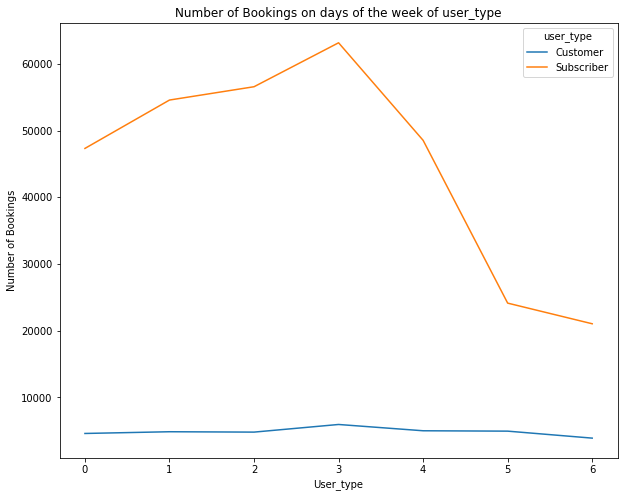

In [32]:
result.groupby(['Booking_weekday','user_type']).count()['bike_id'].unstack().plot(kind='line',figsize=(10,8))
plt.title('Number of Bookings on days of the week of user_type')
plt.xlabel('User_type')
plt.ylabel('Number of Bookings')
plt.show()

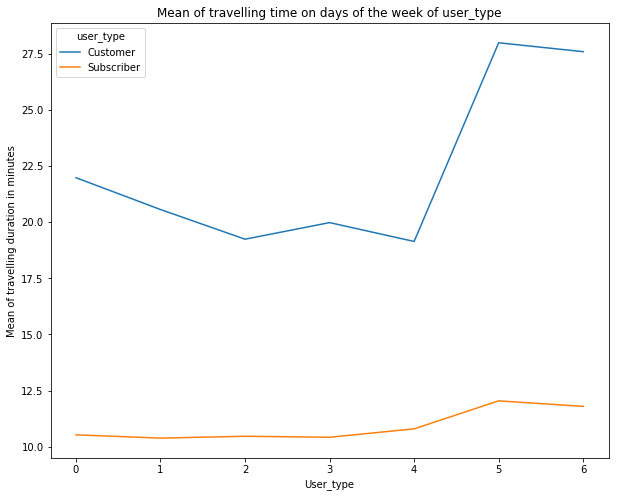

In [33]:
result.groupby(['Booking_weekday','user_type']).mean()['duration_min'].unstack().plot(kind='line',figsize=(10,8))
plt.title('Mean of travelling time on days of the week of user_type')
plt.xlabel('User_type')
plt.ylabel('Mean of travelling duration in minutes')
plt.show()

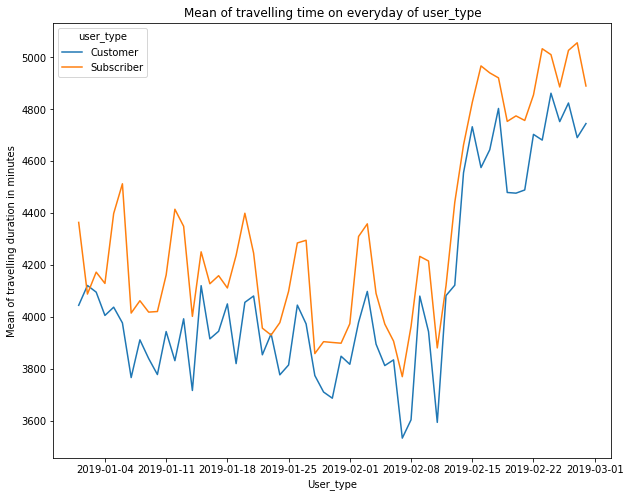

In [34]:
result.groupby([result['start_time'].dt.date,'user_type']).mean()['bike_id'].unstack().plot(kind='line',figsize=(10,8))
plt.title('Mean of travelling time on everyday of user_type')
plt.xlabel('User_type')
plt.ylabel('Mean of travelling duration in minutes')
plt.show()

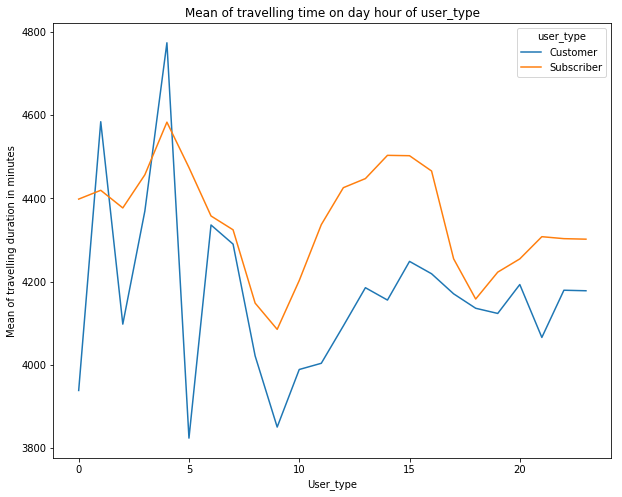

In [35]:
result.groupby([result['start_time'].dt.hour,'user_type']).mean()['bike_id'].unstack().plot(kind='line',figsize=(10,8))
plt.title('Mean of travelling time on day hour of user_type')
plt.xlabel('User_type')
plt.ylabel('Mean of travelling duration in minutes')
plt.show()

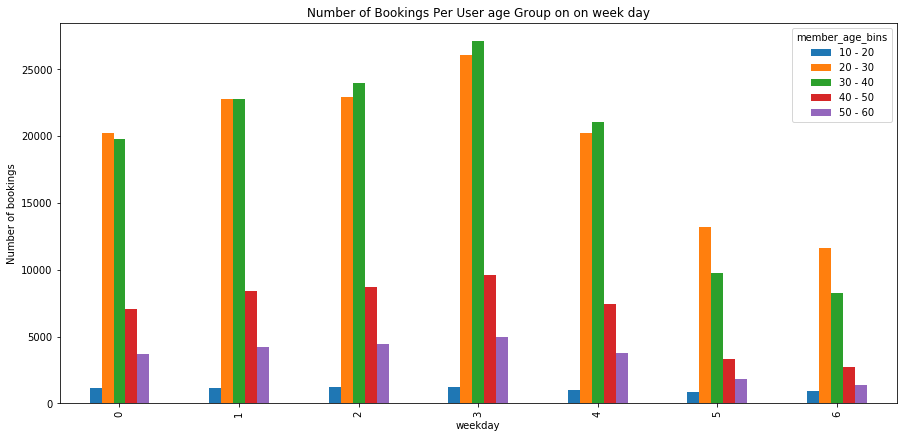

In [36]:
result.groupby([result['start_time'].dt.weekday,'member_age_bins']).count()['bike_id'].unstack().plot(kind='bar',figsize=(15,7),label='bike_id')
plt.title('Number of Bookings Per User age Group on on week day')
plt.xlabel('weekday')
plt.ylabel('Number of bookings')
plt.show()

# Plot on Number of Bookings at hour of the day

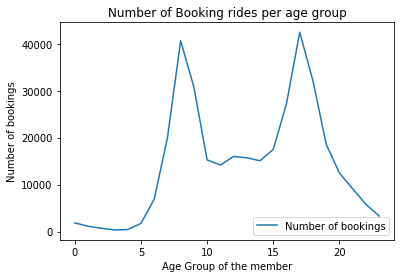

In [37]:
result.groupby(result['start_time'].dt.hour,as_index=False,sort=True).bike_id.count().rename(columns={'bike_id':'Number of bookings'}).plot(kind='line')
plt.title('Number of Booking rides per age group')
plt.xlabel('Age Group of the member')
plt.ylabel('Number of bookings')
plt.show()

# Plot on the Number of Bookings made by evry hour on the weekdays

In [38]:
result.groupby([result['start_time'].dt.weekday,result['start_time'].dt.hour]).count()['bike_id'].head()

start_time  start_time
0           0             168
            1              84
            2              73
            3              44
            4              60
Name: bike_id, dtype: int64

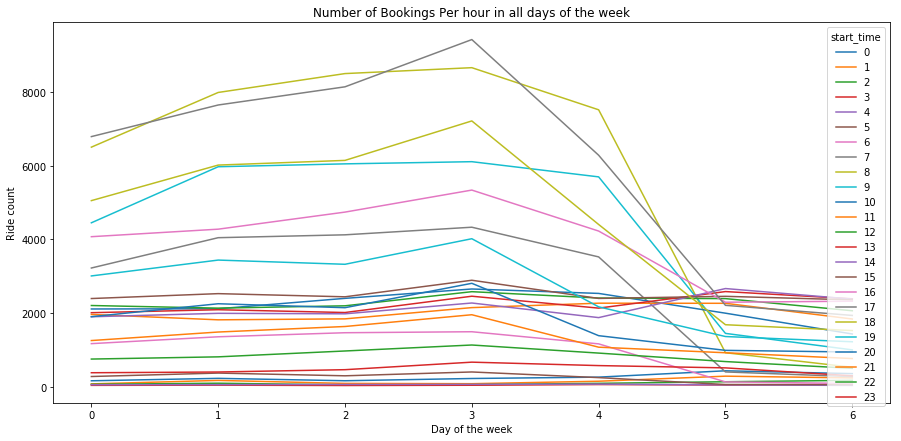

In [39]:
result.groupby([result['start_time'].dt.weekday,result['start_time'].dt.hour]).count()['bike_id'].unstack().plot(kind='line',figsize=(15,7))
plt.title('Number of Bookings Per hour in all days of the week')
plt.xlabel('Day of the week')
plt.ylabel('Ride count')
plt.show()

# Plot on Number of Bookings on weekdays

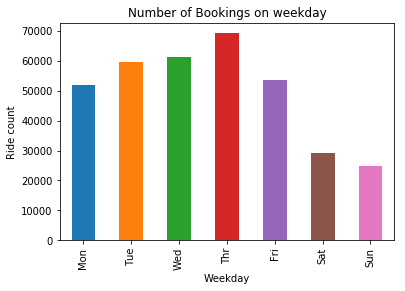

In [40]:
weekday_result=result.groupby('Booking_weekday').bike_id.count()
weekday_result.rename(index={0:'Mon',1:'Tue',2:'Wed',3:'Thr',4:'Fri',5:'Sat',6:'Sun'}, inplace=True)
weekday_result.plot(kind='bar')
plt.title('Number of Bookings on weekday')
plt.xlabel('Weekday')
plt.ylabel('Ride count')
plt.show()

# Plot on Number of bookings made by the user_type on weekdays

In [41]:
result.groupby(['Booking_weekday','user_type'],as_index=False,sort=True).bike_id.count().rename(columns={'bike_id':'Number of bookings'}).head()

,Booking_weekday,user_type,Number of bookings
0,0,Customer,4579
1,0,Subscriber,47333
2,1,Customer,4838
3,1,Subscriber,54588
4,2,Customer,4782


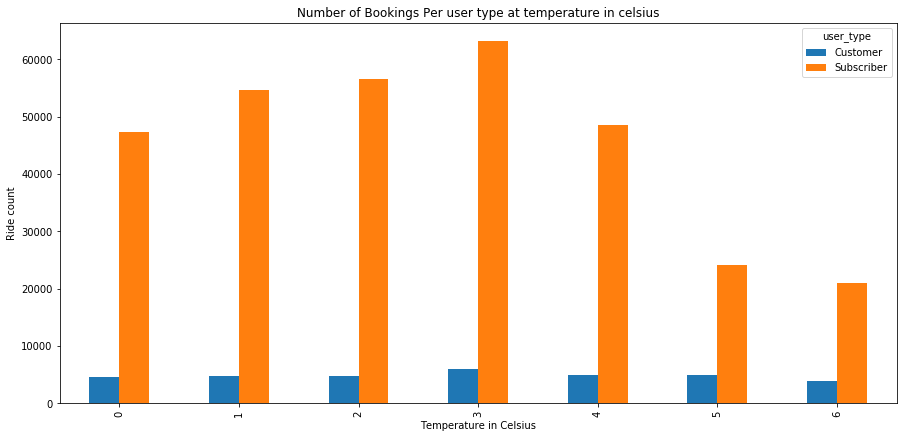

In [42]:
result.groupby(['Booking_weekday','user_type']).count()['bike_id'].unstack().plot(kind='bar',figsize=(15,7))
plt.title('Number of Bookings Per user type at temperature in celsius')
plt.xlabel('Temperature in Celsius')
plt.ylabel('Ride count')
plt.show()

# Plot on Number of bookings made by the member_gender, member_age_groups and user_type on weekdays
Seems to be less number of bookings on the weekends

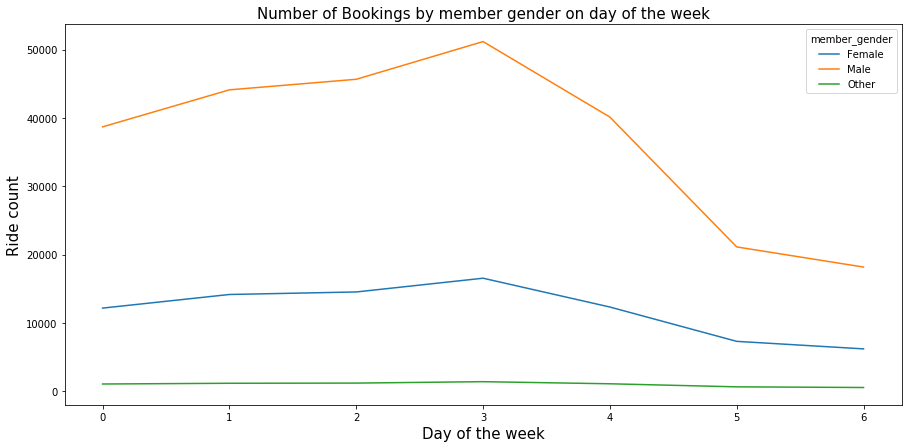

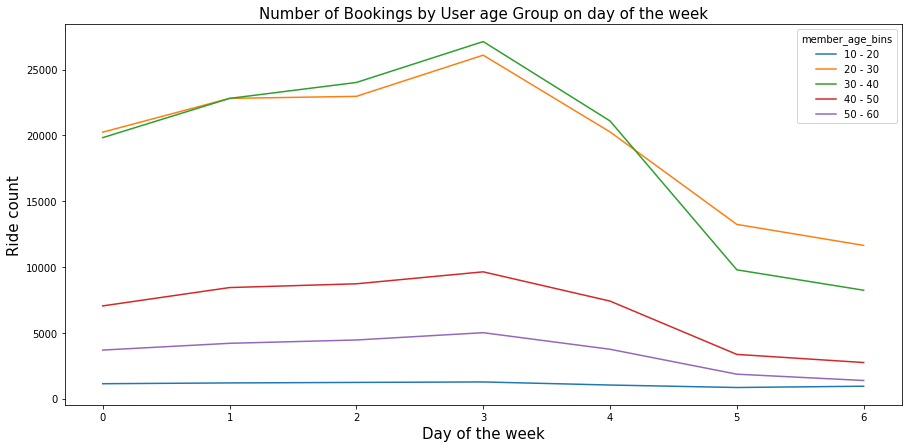

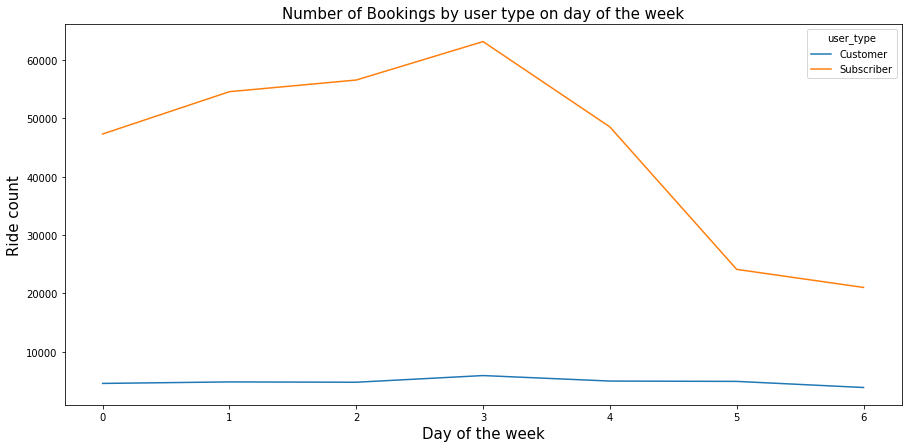

In [43]:
result.groupby(['Booking_weekday','member_gender']).count()['bike_id'].unstack().plot(figsize=(15,7))
plt.title('Number of Bookings by member gender on day of the week',fontsize=15)
plt.xlabel('Day of the week',fontsize=15)
plt.ylabel('Ride count',fontsize=15)
result.groupby(['Booking_weekday','member_age_bins']).count()['bike_id'].unstack().plot(figsize=(15,7))
plt.title('Number of Bookings by User age Group on day of the week',fontsize=15)
plt.xlabel('Day of the week',fontsize=15)
plt.ylabel('Ride count',fontsize=15)
result.groupby(['Booking_weekday','user_type']).count()['bike_id'].unstack().plot(figsize=(15,7))
plt.title('Number of Bookings by user type on day of the week',fontsize=15)
plt.xlabel('Day of the week',fontsize=15)
plt.ylabel('Ride count',fontsize=15)
plt.show()